### Text Data Analysis of Trending YouTube Video Statistics and Comments
Kaggle Data Set (Trending YouTube Video Statistics and Comments)

21st Dec 2022

## Importing all necessary libraries

In [1]:
import numpy as np # Used in numerical computations in the data
import pandas as pd # Used in data manipulation, data extraction and data filtering
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [22]:
comments= pd.read_csv("GBcomments.csv", error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [23]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [24]:
comments

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0
...,...,...,...,...
718447,lLN1FwiqGwc,MEME ME MEME ME MEME ME,0,0
718448,lLN1FwiqGwc,"Yeah, but does everybody float?",0,0
718449,lLN1FwiqGwc,That meme me dace 😂,0,0
718450,lLN1FwiqGwc,10:43 Is that Miles Upshur????,2,0


## Installing the TextBlob library for Sentiment Analysis

In [10]:
!pip install textblob

In [11]:
from textblob import TextBlob

In [14]:
# Polarity of a sentence helps check if a statement is 
# positive or negative
# Polarity simply ddefines the orientation of the expressed statement

# Polarity value for Positive- [>0 and <=1] or 1
# Polarity value for Negative- [<0 and >=-1] or -1
# Polarity value for Neutral- >-1 and <1

## Main Tasks in this Project

1. Performing sentiment analysis on Youtube comments
2. Performing exploratory data analysis on positive sentences
3. Performing exploratory data analysis on negative sentences

## Cleaning the Dataset

### Checking for missing values

In [25]:
comments.isna()

,video_id,comment_text,likes,replies
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
718447,False,False,False,False
718448,False,False,False,False
718449,False,False,False,False
718450,False,False,False,False


In [26]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

### Removing the missing values from the dataset

In [27]:
comments= comments.dropna()
comments

# Or comments.dropna(inplace= True)

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0
...,...,...,...,...
718447,lLN1FwiqGwc,MEME ME MEME ME MEME ME,0,0
718448,lLN1FwiqGwc,"Yeah, but does everybody float?",0,0
718449,lLN1FwiqGwc,That meme me dace 😂,0,0
718450,lLN1FwiqGwc,10:43 Is that Miles Upshur????,2,0


In [28]:
comments.isna().sum()
# There is no missing values

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

### Storing all sentiment of sentence into a variable

In [29]:
polarity= []
for i in comments["comment_text"]:
    polarity.append(TextBlob(i).sentiment.polarity)

In [30]:
comments["polarity"]= polarity
comments

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00
...,...,...,...,...,...
718447,lLN1FwiqGwc,MEME ME MEME ME MEME ME,0,0,0.00
718448,lLN1FwiqGwc,"Yeah, but does everybody float?",0,0,0.00
718449,lLN1FwiqGwc,That meme me dace 😂,0,0,0.00
718450,lLN1FwiqGwc,10:43 Is that Miles Upshur????,2,0,0.00


In [31]:
## Updating the comments dataset

In [32]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


## Exploratory data analysis

### Looking into the positive sentences

In [45]:
comments_positive= comments[comments["polarity"]==1]

In [46]:
comments_positive

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0
...,...,...,...,...,...
718390,lLN1FwiqGwc,I'm just stopping the video three minutes in t...,0,0,1.0
718416,lLN1FwiqGwc,Beating up tommy wiseu was the best part of th...,0,0,1.0
718432,lLN1FwiqGwc,kudos for the mtg cards :D,0,0,1.0
718440,lLN1FwiqGwc,Tommy Wiseau is my greatest fear,0,0,1.0


In [35]:
comments_positive.shape

(20400, 5)

In [36]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


## Visualize using wordcloud

In [38]:
# word cloud is a data visualization techniques used for representing text data
# and from which we can get to know the word size
# Size of the word indicates its frequency or importance
# Bigger size of word means it has a high frequency and more used

### Installing the wordcloud

In [39]:
!pip install wordcloud

In [40]:
# Stopwords (the, is, and, etc)- are used to eliminate unimportant words
# so we can focus on important and useful words

In [41]:
from wordcloud import WordCloud, STOPWORDS

In [42]:
# This will take the unique words that are unimportant to us
stopwords= set(STOPWORDS)

In [51]:
total_comments= (comments_positive["comment_text"])

In [52]:
total_comments

4         Power is the disease.  Care is the cure.  Keep...
26                  The best thing to ever happen to iPhone
80        Apple is always awesome \n\nhttps://youtu.be/r...
158       das a lot of edditing you have done there ... ...
175                             Welcome to the Scandiworld!
                                ...                        
718390    I'm just stopping the video three minutes in t...
718416    Beating up tommy wiseu was the best part of th...
718432                           kudos for the mtg cards :D
718440                     Tommy Wiseau is my greatest fear
718443                                             The best
Name: comment_text, Length: 20400, dtype: object

In [78]:
# This will store all the sentences which were individually stored in the column comment_text
total_positive= "".join(comments_positive["comment_text"])

In [79]:
total_positive

"Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.The best thing to ever happen to iPhoneApple is always awesome \\n\\nhttps://youtu.be/rftzm6X1yP4das a lot of edditing you have done there ... I like it :DWelcome to the Scandiworld!Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life.WHY DO I KEEP FREAKING LAUGHING EACH TIME I WATCH IT AGAIN ! even though I know how it will end. omg the best 😂LIKE = MEET CELEBRITY \\nSUBSCRIBE = BECOME A BILLIONAIRE\\nSCROLL UP/DOWN = DEATH FOR YOU AND EVERYONE YOU LOVE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!the sonic air timer was perfectno 16 on trending impressiveMy daughters name is lacey <3I'm 17 and can proudly say Moon Dreamers was one of my favourite shows!if I could subscribe to Dude Perfect a million times I wouldYou guys should make dude perfect sceetsTo be a dude perfect member it is so awesome ....Dude Perfect sh

In [87]:
# To form the WordCloud
wordcloud= WordCloud(width=2000, height= 500, stopwords= stopwords).generate(total_positive)

## Visualizing positive comments using WordCloud

(-0.5, 1999.5, 499.5, -0.5)

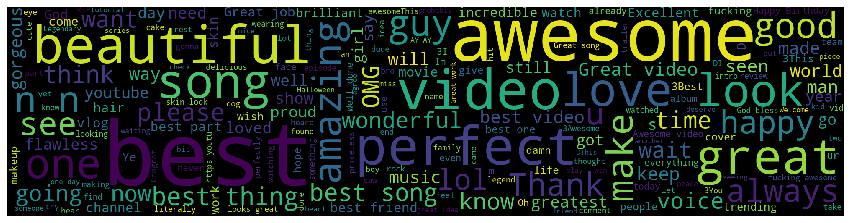

In [88]:
# Show the wordcloud with the following code
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")

### Looking into the negative sentences

In [83]:
comments_negative= comments[comments["polarity"]==-1]

In [84]:
total_negative= "".join(comments_negative["comment_text"])
total_negative

"boring0:22   **laughs at terrible pun**this is the worst thing i've heard. ever.People making jokes about 9/11 is truly disgusting. Hundreds of people died for God's sake - have some respect.Thats insane.How is this trending ? AwfulButthurt Sean, idiot!Nigga nigga nigga ni... Fucking.... Nigga!!!!!!!!Just gone and bought these bad boys!!!! ❤️❤️❤️❤️ had an alarm set in my phone and everythingPlease let this die, you can tell the actors are miserable.can't wait :'(Don't be bringing cucumbers to the theaters this time!! You know who you are, ya nastyHandmaids Tale was boring, I foundI won't read this comment. What a Dick I am, I can't believe I just read this. I am pathetic!all the products are horriblejim carrey lost it, became a boring socialist hippyWinner Tacos were my favourite growing up too! People always thought I was insane when I described it amd kept on claiming that I was just misremembering Maxibons.Terrible, at times like this we need to come together not stealYour style is

In [85]:
wordcloud= WordCloud(width=1000, height= 500, stopwords=stopwords).generate(total_negative)

## Visualize negative comments using WordCloud 

(-0.5, 999.5, 499.5, -0.5)

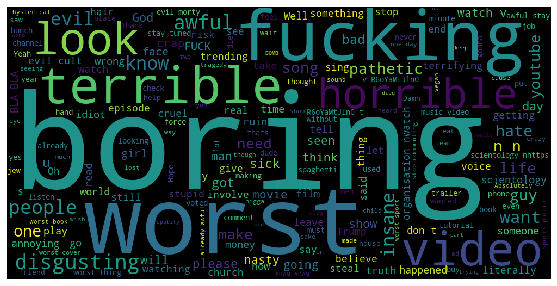

In [86]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")

# The End

In [90]:
videos= pd.read_csv("GBvideos.csv", error_bad_lines=False)
videos

b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,emmablackery|emma blackery|emma|blackery|briti...,142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,sprinkleofglitter|sprinkle of glitter|baby gli...,40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09
...,...,...,...,...,...,...,...,...,...,...,...
7988,T2RUYYs8Hxc,DJ Cummerbund - Hey Trump!,DJ Cummerbund,10,eminem|freestyle|bet|rage against the machine|...,118453,1846,92,240,https://i.ytimg.com/vi/T2RUYYs8Hxc/default.jpg,22.10
7989,KkQdnJK1iF8,Emotional Groom Start Crying When He Sees Brid...,Today`s Video,22,Today's Video|Today Video|Latest News|Last|New...,76096,194,19,31,https://i.ytimg.com/vi/KkQdnJK1iF8/default.jpg,22.10
7990,1zOPtQNChZM,FALLING IN LOVE WITH SANTORINI,Estée Lalonde,22,essiebutton|Estée Lalonde|Estee Lalonde|Essie ...,170003,6592,127,454,https://i.ytimg.com/vi/1zOPtQNChZM/default.jpg,22.10
7991,Z7R8XRKqHAI,Hey Ya! - Walk off the Earth (Outkast Cover),Walk off the Earth,10,hey ya cover|amazing cover|Shape of You Walk o...,893125,44811,652,2056,https://i.ytimg.com/vi/Z7R8XRKqHAI/default.jpg,22.10


In [91]:
US_comments= pd.read_csv("UScomments.csv", error_bad_lines= False)
US_comments

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [96]:
US_vidoes= pd.read_csv("USvideos.csv", error_bad_lines=False)
US_vidoes

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09
...,...,...,...,...,...,...,...,...,...,...,...
7987,xlu6i6lT_vk,How Do MASSIVE Sinkholes Form?,Life Noggin,27,sinkhole|how do sinkholes form|sinkhole in wat...,440393,14362,390,1575,https://i.ytimg.com/vi/xlu6i6lT_vk/default.jpg,22.10
7988,qRoVlH1OcI4,Trump slams Clinton for defending NFL anthem p...,Business Insider,25,Business Insider|Donald Trump|Hillary Clinton|...,55762,1265,760,1873,https://i.ytimg.com/vi/qRoVlH1OcI4/default.jpg,22.10
7989,EoejGgUNmVU,LP - Lost On You (A Night at The McKittrick Ho...,LP,10,LP|Death Valley|Other People|Lost On You|The M...,142908,7088,68,437,https://i.ytimg.com/vi/EoejGgUNmVU/default.jpg,22.10
7990,MT1CMTI0EVw,Tré Melvin @ #YouTubeBlack FanFest Washington ...,YouTube FanFest,24,YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...,24532,2148,77,0,https://i.ytimg.com/vi/MT1CMTI0EVw/default.jpg,22.10
